# Gradient Descent for Regression

### 2.1

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the training data 
data = pd.read_csv("Datasets/Dataset_2_train.csv", header = -1,usecols=range(2))
cols = ["x","y"]
data.columns = cols
data.head()

    

,x,y
0,1.134362,8.755218
1,0.628288,6.080669
2,0.914297,7.154124
3,0.795270,6.725596
4,1.386819,9.262608


In [4]:
# Read the validation data 
valid = pd.read_csv("Datasets/Dataset_2_valid.csv", header = -1,usecols=range(2))
cols = ["x","y"]
valid.columns = cols
valid.head()


,x,y
0,0.285947,5.068739
1,1.115251,8.439574
2,0.687795,6.351955
3,0.234410,4.190641
4,0.501254,5.469572


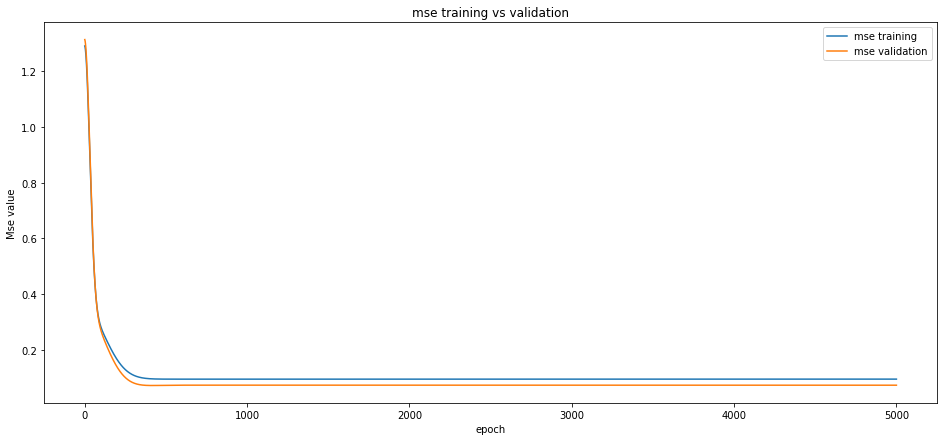

In [5]:
# We set our initial alpha at 10^-6
alpha = 0.000001
MSE_t = []
MSE_v = []
w0 = 2
w1 = 5
for i in range(5000):
    for x in range(len(data['x'])):
        w0 = w0 - alpha*(w1*data['x'][x]+w0 - data['y'][x])
        w1 = w1 - alpha*(w1*data['x'][x]+w0 - data['y'][x])*data['x'][x]
    
    P = np.poly1d([w1,w0])
    T = [P(i) for i in data['x']]
    V = [P(i) for i in valid['x']]
    
    sigmat = 0
    for i in range(len(T)):
        sigmat = sigmat + (T[i] - data['y'][i])**2 
    MSE_t = MSE_t + [sigmat/len(T)]
    
    sigmav = 0
    for i in range(len(V)):
        sigmav = sigmav + (V[i] - valid['y'][i])**2 
    MSE_v = MSE_v + [sigmav/len(V)]
    
    alpha = alpha + 0.000001
    
axis = np.arange(1, 5001, 1)

plt.figure(figsize=(16, 7))
plt.plot(axis, MSE_t, label="mse training")
plt.plot(axis, MSE_v, label="mse validation")
plt.title("mse training vs validation")
plt.xlabel("epoch")
plt.ylabel("Mse value")
plt.legend()
plt.show()


### 2.2

In [6]:
steps = [1,0.1,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001]
Best = -1
# the best alpha
B = -1
min_mse = sys.maxsize
for i in steps:
    alpha = i
    s = i
    MSE_v = []
    w0 = 2
    w1 = 5
    
    for j in range(5000):
        for x in range(len(data['x'])):
            w0 = w0 - alpha*(w1*data['x'][x]+w0 - data['y'][x])
            w1 = w1 - alpha*(w1*data['x'][x]+w0 - data['y'][x])*data['x'][x]
    
        P = np.poly1d([w1,w0])
        V = [P(i) for i in valid['x']]
    
        sigmav = 0
        for i in range(len(V)):
            sigmav = sigmav + (V[i] - valid['y'][i])**2/len(V) 
        if (min_mse > sigmav):
            min_mse = sigmav
            Best = s
            B = alpha
    
        alpha = alpha +s

/home/ymhedh/anaconda3/envs/Assignment1-551/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/home/ymhedh/anaconda3/envs/Assignment1-551/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/home/ymhedh/anaconda3/envs/Assignment1-551/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ymhedh/anaconda3/envs/Assignment1-551/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/ymhedh/anaconda3/envs/Assignment1-551/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [43]:

w0 = 2
w1 = 5
for x in range(len(data['x'])):
        w0 = w0 - B*(w1*data['x'][x]+w0 - data['y'][x])
        w1 = w1 - B*(w1*data['x'][x]+w0 - data['y'][x])*data['x'][x]  
P= np.poly1d([w1,w0])

In [44]:
# Read the test data 
test = pd.read_csv("Datasets/Dataset_2_test.csv", header = -1,usecols=range(2))
cols = ["x","y"]
test.columns = cols

TE = [P(i) for i in test['x']]

test_mse = 0
for i in range(len(TE)):
    test_mse = test_mse + (TE[i] - test['y'][i])**2/len(TE)

print(test_mse)

0.208061016794


[2.9399543809520776, 5.1095759841903732]
[3.1590432166633531, 4.8425709896264308]
[3.4316982153334661, 4.4244455574225103]
[3.479209545331269, 4.0464881954281031]
[3.0710636685560337, 4.2076938579809111]


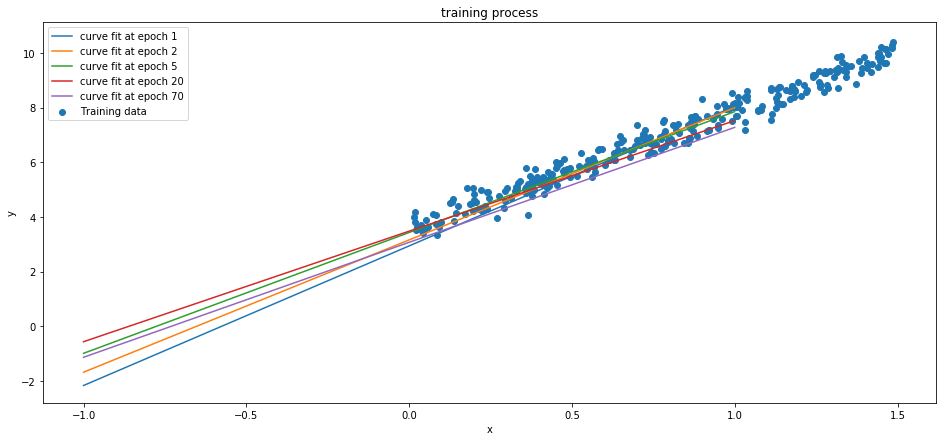

In [50]:
import matplotlib.pyplot as plt
step = [1,2,5,20,70]
data = pd.read_csv("Datasets/Dataset_2_train.csv", header = -1,usecols=range(2))
cols = ["x","y"]
data.columns = cols
data.head()
axis = np.arange(-1,1 ,0.001)
plt.figure(figsize=(16, 7))

for k in step:
    i = k*B
    w0 = 2
    w1 = 5
    for x in range(len(data['x'])):
        w0 = w0 - i*(w1*data['x'][x]+w0 - data['y'][x])
        w1 = w1 - i*(w1*data['x'][x]+w0 - data['y'][x])*data['x'][x]
    P = np.poly1d([w1,w0])  
    T=[P(i) for i in axis]
    print([w0,w1])
    plt.plot(axis, T, label="curve fit at epoch "+str(k))
    
    
plt.scatter(data['x'], data['y'], label="Training data")
plt.title("training process")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()